In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

## Package	Description

torch The top-level PyTorch package and tensor library.

torch.nn A subpackage that contains modules and extensible classes for building neural networks.

torch.optim A subpackage that contains standard optimization operations like SGD and Adam.

torch.nn.functional A functional interface that contains typical operations used for building neural networks like loss functions and convolutions.

torchvision A package that provides access to popular datasets, model architectures, and image transformations for computer vision.

torchvision.transforms An interface that contains common transforms for image processing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [5]:
# class FashionMNIST(MNIST):
#     """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

#     Args:
#         root (string): Root directory of dataset where ``processed/training.pt``
#             and  ``processed/test.pt`` exist.
#         train (bool, optional): If True, creates dataset from ``training.pt``,
#             otherwise from ``test.pt``.
#         download (bool, optional): If true, downloads the dataset from the internet and
#             puts it in root directory. If dataset is already downloaded, it is not
#             downloaded again.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#     """
#     urls = [
#         'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
#         'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
#         'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
#         'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
#     ]

## Pytorch dataset class

In [7]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/home/snehal/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Pytorch dataloader class

In [9]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [10]:
len(train_set)

60000

In [11]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [13]:
sample = next(iter(train_set))

In [15]:
len(sample) # Image, Label

2

In [16]:
image,label = next(iter(train_set))

In [19]:
type(image)

torch.Tensor

In [21]:
type(label)

int

In [22]:
image.shape

torch.Size([1, 28, 28])

In [23]:
torch.tensor(label).shape

torch.Size([])

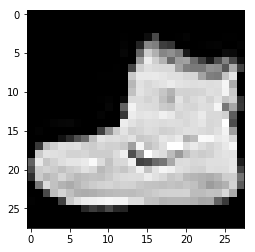

In [26]:
plt.imshow(image.squeeze(), cmap="gray")

## Working with batches

In [27]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [28]:
batch = next(iter(display_loader))
print('len:', len(batch))

len: 2


In [30]:
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


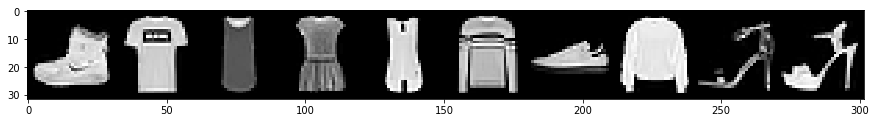

In [32]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels:', labels)

## Plot images using dataloader

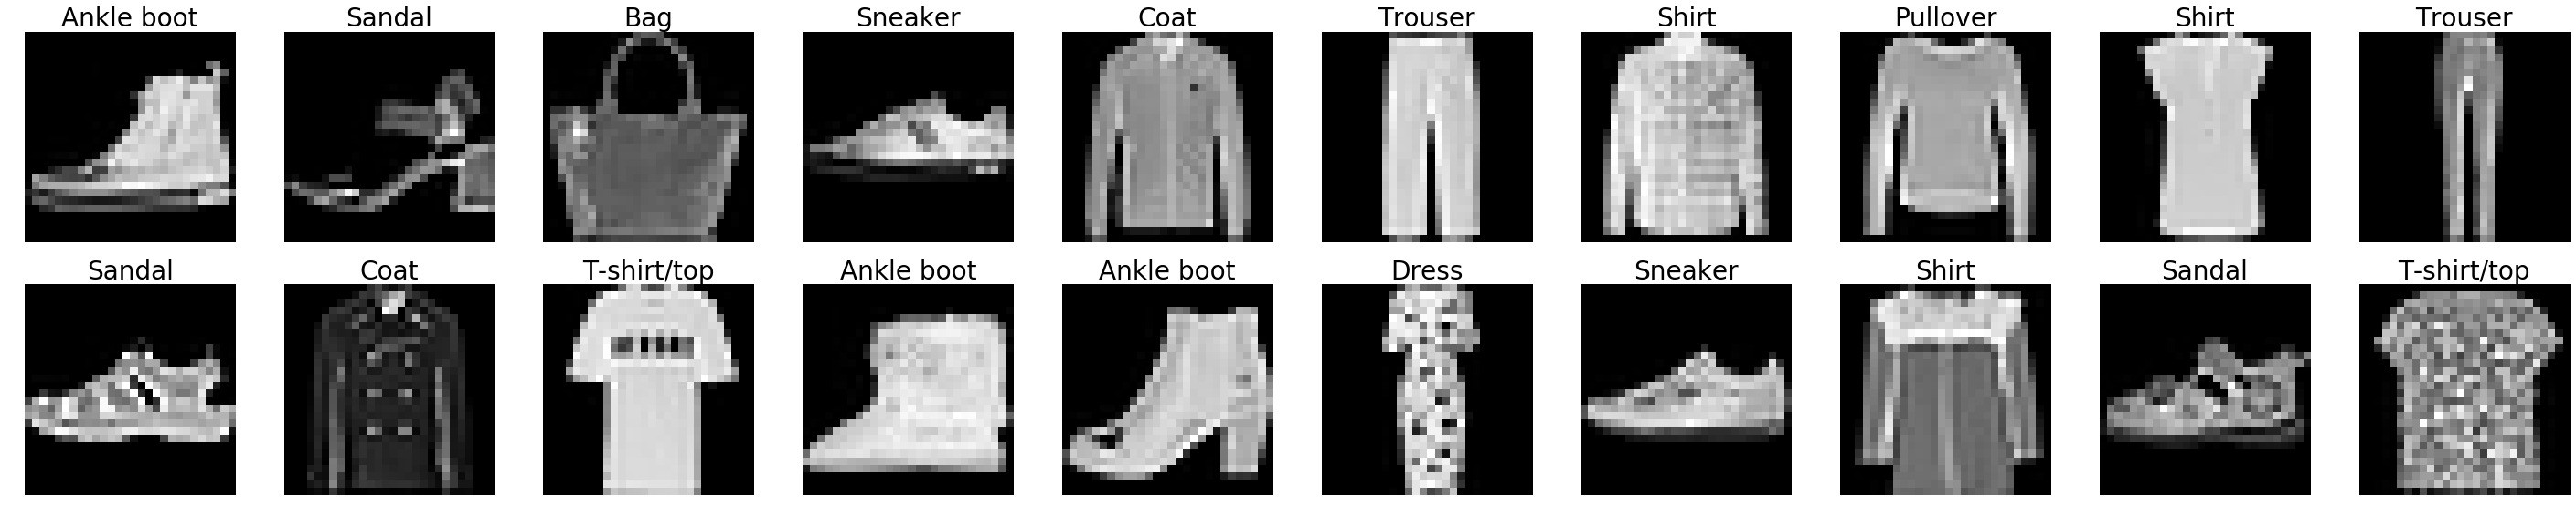

In [36]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()